# **Day - 5 | Handwritten Digit Recognition | SVM**

### *Importing Basic Libraries*

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

### *Load Dataset*
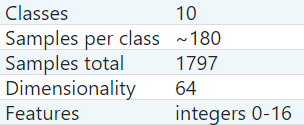

In [ ]:
dataset = load_digits()

### *Summarize Dataset*

In [ ]:
print(dataset.data)
print(dataset.target)

print(dataset.data.shape)
print(dataset.images.shape)

dataimageLength = len(dataset.images)
print(dataimageLength)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797, 8, 8)
1797


### *Visualize the Dataset*

<Figure size 432x288 with 0 Axes>

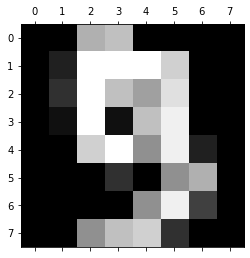

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

In [ ]:
n=9 #No. of Sample out of Samples total 1797

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.images[n])
plt.show()

dataset.images[n]

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

### *Input - Pixel | Output - Class*

In [ ]:
X = dataset.images.reshape((dataimageLength,-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
Y = dataset.target
Y

array([0, 1, 2, ..., 8, 9, 8])

### *Splitting Dataset into Train & Test*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


### *Training*

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### *Predicting, what the digit is from Test Data*

[3]




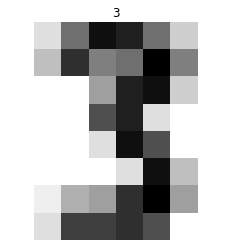

In [ ]:
n=13
result = model.predict(dataset.images[n].reshape((1,-1)))
plt.imshow(dataset.images[n], cmap=plt.cm.gray_r, interpolation='nearest')     
print(result)
print("\n")
plt.axis('off')
plt.title('%i' %result)
plt.show()

### *Prediction for Test Data*

In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [8 8]
 [2 2]
 [6 6]
 [6 6]
 [7 7]
 [1 1]
 [9 9]
 [8 8]
 [5 5]
 [2 2]
 [8 8]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [1 1]
 [0 0]
 [5 5]
 [8 8]
 [8 8]
 [7 7]
 [8 8]
 [4 4]
 [7 7]
 [5 5]
 [4 4]
 [9 9]
 [2 2]
 [9 9]
 [4 4]
 [7 7]
 [6 6]
 [8 8]
 [9 9]
 [4 4]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [8 8]
 [6 6]
 [7 7]
 [7 7]
 [1 1]
 [0 0]
 [7 7]
 [6 6]
 [2 2]
 [1 1]
 [9 9]
 [6 6]
 [7 7]
 [9 9]
 [0 0]
 [0 0]
 [5 5]
 [1 1]
 [6 6]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [4 4]
 [1 1]
 [9 9]
 [2 2]
 [6 6]
 [9 9]
 [1 1]
 [8 8]
 [3 3]
 [5 5]
 [1 1]
 [2 2]
 [8 8]
 [2 2]
 [2 2]
 [9 9]
 [7 7]
 [2 2]
 [3 3]
 [6 6]
 [0 0]
 [5 5]
 [3 3]
 [7 7]
 [5 5]
 [1 1]
 [2 2]
 [9 9]
 [9 9]
 [3 3]
 [1 1]
 [7 7]
 [7 7]
 [4 4]
 [8 8]
 [5 5]
 [8 8]
 [5 5]
 [5 5]
 [2 2]
 [5 5]
 [9 9]
 [0 0]
 [7 7]
 [1 1]
 [4 4]
 [4 7]
 [3 3]
 [4 4]
 [8 8]
 [9 9]
 [7 7]
 [9 9]
 [8 8]
 [2 2]
 [1 6]
 [5 5]
 [2 2]
 [5 5]
 [8 8]
 [4 4]
 [1 8]
 [7 7]
 [0 0]
 [6 6]
 [1 1]
 [5 5]
 [5 9]
 [9 9]
 [9 9]
 [5 5]
 [9 9]
 [9 9]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [2 2]
 [8 8]
 [6 6]

### *Evaluate Model - Accuracy Score*

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 97.11111111111111%


### *Play with the Different Method*

In [ ]:
from sklearn import svm
model1 = svm.SVC(kernel='linear')
model2 = svm.SVC(kernel='rbf')
model3 = svm.SVC(gamma=0.001)
model4 = svm.SVC(gamma=0.001,C=0.1)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

y_predModel1 = model1.predict(X_test)
y_predModel2 = model2.predict(X_test)
y_predModel3 = model3.predict(X_test)
y_predModel4 = model4.predict(X_test)

print("Accuracy of the Model 1: {0}%".format(accuracy_score(y_test, y_predModel1)*100))
print("Accuracy of the Model 2: {0}%".format(accuracy_score(y_test, y_predModel2)*100))
print("Accuracy of the Model 3: {0}%".format(accuracy_score(y_test, y_predModel3)*100))
print("Accuracy of the Model 4: {0}%".format(accuracy_score(y_test, y_predModel4)*100))

Accuracy of the Model 1: 97.11111111111111%
Accuracy of the Model 2: 99.11111111111111%
Accuracy of the Model 3: 99.55555555555556%
Accuracy of the Model 4: 96.66666666666667%
